<a href="https://colab.research.google.com/github/snehasivakripa/cs666student/blob/main/NEW_of_CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

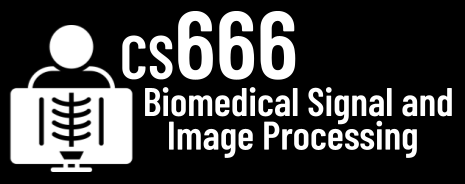
#Assignment 4

In [3]:
# NAME: SNEHA BABUJI

In [4]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [5]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [7]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [8]:
# Please download this file: https://cs666.org/data/xray/ with the wget command!
# Note: Please use the forwarded dropbox link and change dl=0 to dl=1!
# This is a subset of the Kaggle Pneumonia + Covid Datasets!

In [9]:
!wget https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1

--2024-04-05 01:36:20--  https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2ca2889o2ql8n4e/xray.zip [following]
--2024-04-05 01:36:20--  https://www.dropbox.com/s/dl/2ca2889o2ql8n4e/xray.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7218481c02455b3700687d9e43.dl.dropboxusercontent.com/cd/0/get/CQbrjXYobVgZxX9zQkkht1BSIoTU5A22oSPnuEM9CGMFCAOERmVxdD2OXbIxa0h6fFvFLv4f3uB3dYCwyiZP53mrfeCXbMRbRX1xB0Mq7xOB6Af0YemX4PHDMWNAcm9PxICy5Cw1w1Z1_iM2Sgh6o6pc/file?dl=1# [following]
--2024-04-05 01:36:20--  https://uc7218481c02455b3700687d9e43.dl.dropboxusercontent.com/cd/0/get/CQbrjXYobVgZxX9zQkkht1BSIoTU5A22oSPnuEM9CGMFCAOERmVxdD2OXbIxa0h6fFvFLv4f3uB3dYCwyiZP53mrfeCXbMRbRX1xB0Mq7xOB6Af0

In [10]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip?dl=1', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [11]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [12]:
# TODO: Please display this image and print the dimensions!

In [13]:
# TODO: YOUR CODE

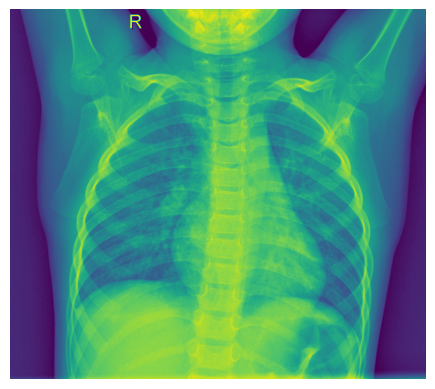

Image dimensions: (1858, 2090)


In [14]:
import matplotlib.pyplot as plt
if img is not None:
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

    print("Image dimensions:", img.shape)
else:
    print("Image not found or cannot be loaded.")

**Task 2:** Let's do some data wrangling and more visualization! [30 Points]

In [15]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [16]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) Loading images from directories and initialising numpy array data of size to store length
#                    of all the files and with height and weight 300 each.
# TODO: Operation 2) Getting image dimension of each image and checking if its greater than 2 then
#                    changing it from rgb to gray and resizing whole images to 300*300
# TODO: Operation 3) Loading the resized image to numpy array data

In [17]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [18]:
# TODO: YOUR CODE

Pneumonia


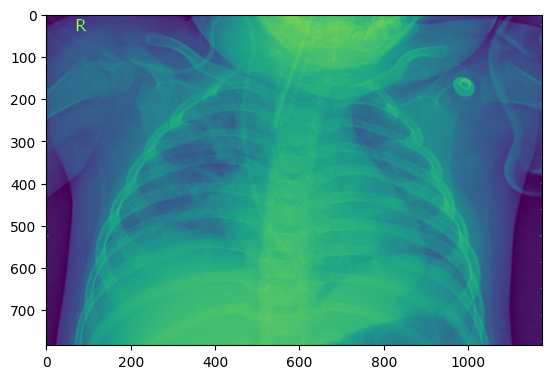

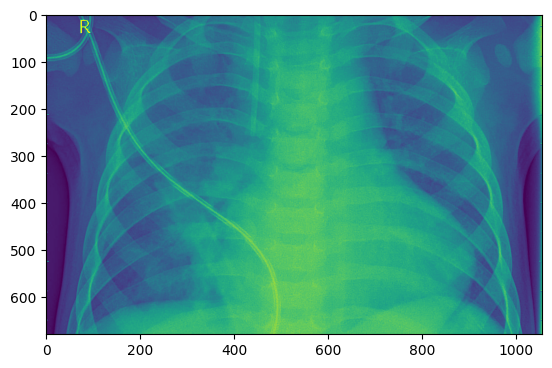

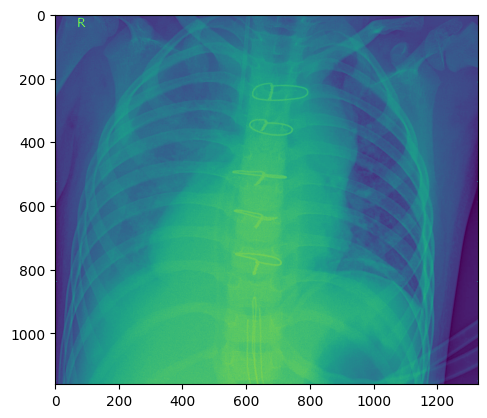

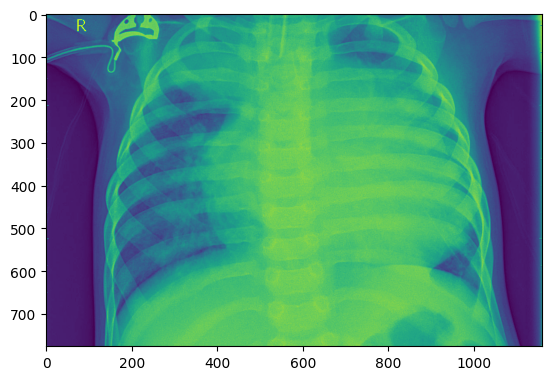

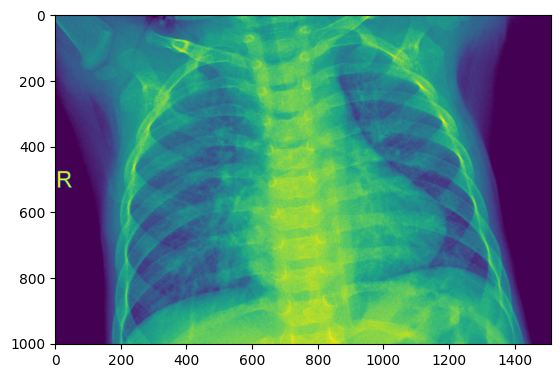

Normal


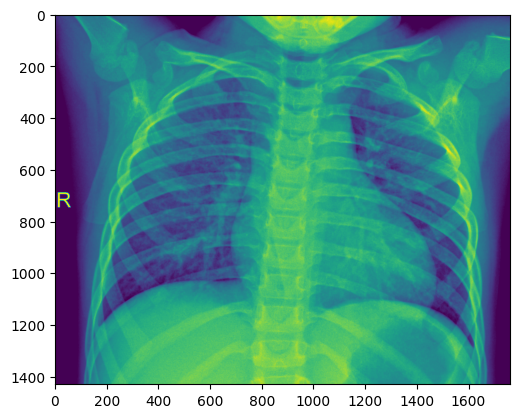

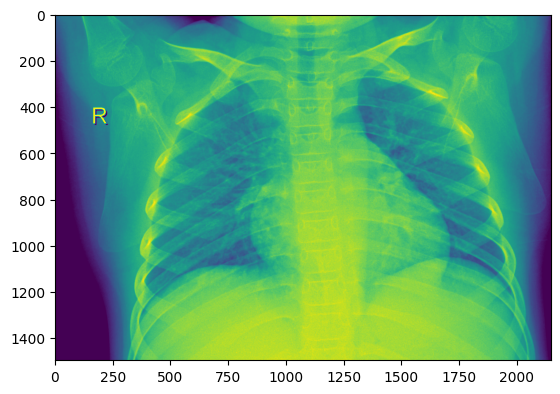

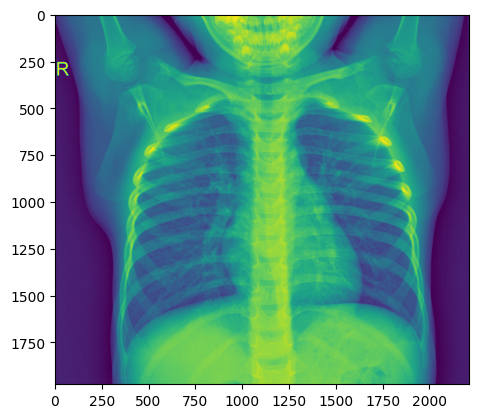

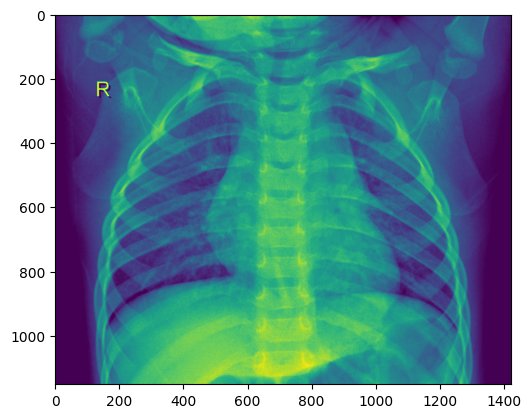

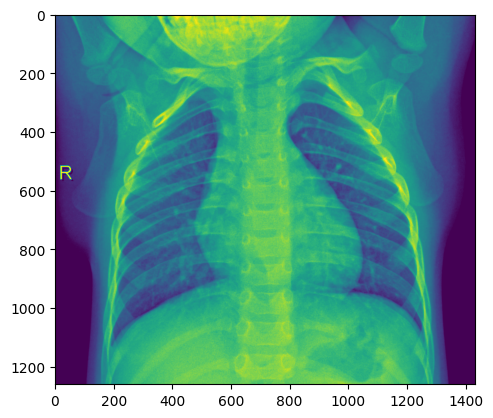

In [19]:
import matplotlib.image as mpimg

def process(filename: str) -> None:
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)
    plt.show()

# List of folder paths containing images
folder_paths = ['/content/pneumonia', '/content/normal']

# Iterate through each folder path
for folder_path in folder_paths:
    # Printing the folder
    name=os.path.basename(os.path.normpath(folder_path))
    print('\033[1m'+name.title())
    # Counter to track the number of processed images
    count = 0
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is an image file (you may add more image extensions as needed)
        if file_name.endswith('.jpeg'):
            file_path = os.path.join(folder_path, file_name)
            process(file_path)
            # Increment the counter
            count += 1
            # Check if 5 images have been processed from the current folder
            if count >= 5:
                break  # Exit the loop if 5 images have been processed from the current folder
            else:
                continue  # Continue to the next folder if 5 images haven't been processed yet


**Task 3:** Setup training and testing data. [15 Points]

In [20]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [21]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1


In [22]:
# TODO: Please create the y_train vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
# Define vector
y_vector = [0, 1, 2]

# Initialize y_train array
y_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)

# Counter for position in y_train
y_pos = 0

# Iterate through data to assign labels
for label, d in enumerate(data):
    for image in d[0:TRAINING_COUNT]:
      y_train[y_pos:y_pos+len(image)] = y_vector[label]
      y_pos += len(image)

In [23]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [24]:
# TODO: Please create the y_test vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.

In [25]:

# Define vector
y_vector = [0, 1, 2]

# Initialize y_test array
y_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)

# Counter for position in y_test
y_pos = 0

# Iterate through data to assign labels
for label, d in enumerate(data):
    for image in d[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]:
      y_test[y_pos:y_pos+len(image)] = y_vector[label]
      y_pos += len(image)

**Task 4:** Let's train and evaluate the Random Forest! [30 Points]

In [26]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [66]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [67]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [29]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [30]:
# TODO: YOUR ANSWER
# Random forest trains by building multiple decision trees.
# Each tree is trained on a randum subset of training data
# During the prediction of the test data, each tree in the classifier predicts the output and final prediction
# is determined by aggregating the individual tree predictions.

In [31]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [32]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [33]:
# The classification accuracy is very good and I am really surprised.

**Task 5:** Now, let's decrease the number of trees! [10 Points]

In [34]:
# How many trees are used in Task 4?

In [35]:
# The default value for n_estimator in a RandomForest Classifier is 100

In [36]:
# Now, please use a single tree and observe the testing performance.

In [69]:
clf = RandomForestClassifier(n_estimators=1)
fitted = clf.fit( X_train, y_train )
clf.score( X_test, y_test )

1.0

In [38]:
# Are you surprised?

In [37]:
# Yes its truely surprising

**Bonus:** Let's take a closer look! [33 Points]

In [45]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [70]:
# TODO: YOUR CODE AND YOUR ANSWER
# TODO: YOUR CODE AND YOUR ANSWER
REMAINING_COUNT = 99

X_test_remain = np.zeros( (REMAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[TRAINING_COUNT+TESTING_COUNT:TRAINING_COUNT+TESTING_COUNT+REMAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test_remain[t_pos] = image
    t_pos += 1


# Define vector
y_vector = [0,1,2]

# Initialize y_train array
y_test_remain = np.zeros( (REMAINING_COUNT * 3, 300*300 ), dtype=np.float32)

# Counter for position in y_train
y_pos = 0

# Iterate through data to assign labels
for label, d in enumerate(data):
    for image in d[TRAINING_COUNT+TESTING_COUNT:TRAINING_COUNT+TESTING_COUNT+REMAINING_COUNT]:
      y_test_remain[y_pos] = y_vector[label]
      y_pos += 1

clf.score( X_test_remain, y_test_remain )


0.6666666666666666

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw